## Crime Incident Report

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

#### Research Question/Objective
Calculating the total number of crimes per hour for the 2 hours before the entertainment/control event, the hours during the entertainment/control event, and the 2 hours after the entertainment/control event.

#### Baltimore, Maryland Crime Data

In [13]:
#Read in Data
crimedata = pd.read_csv("/Users/ebadamun/Downloads/Crime_Report_2013.csv")
#Create Date Column in specified datetime format
crimedata["Date"] = pd.to_datetime(crimedata["CrimeDate"], format='%m/%d/%Y %H:%M:%S %p').dt.strftime("%Y-%m-%d")
#Create Time Column in specific datetime format - i.e. rounding to HR
crimedata["Time"] = pd.to_datetime(crimedata["CrimeTime"], format='%H:%M:%S').dt.strftime("%H")
#Selecting Crimes only between the hours of 11-18 (24 Hr) i.e. the hours during a Normal Baltimore Raven's Sunday Afternoon Football Game
crimedatanew = crimedata[(crimedata["Time"] >= '11') & (crimedata["Time"] < '18')]
crimedatanew.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,District,Neighborhood,Date,Time
4,04/18/2020 12:00:00 AM,17:00:00,5D,AV & 7TH ST,BURGLARY,NaN,SOUTHERN,NaN,2020-04-18,17
5,04/18/2020 12:00:00 AM,11:18:00,6C,4100 PULASKI HWY,LARCENY,NaN,EASTERN,KRESSON,2020-04-18,11
7,04/18/2020 12:00:00 AM,16:00:00,5A,1600 WESTWOOD AVE,BURGLARY,NaN,WESTERN,SANDTOWN-WINCHESTER,2020-04-18,16
15,04/18/2020 12:00:00 AM,16:28:00,4E,600 OLDHAM ST,COMMON ASSAULT,NaN,SOUTHEAST,GREEKTOWN,2020-04-18,16
16,04/18/2020 12:00:00 AM,13:30:00,4C,4300 ADELLE TER,AGG. ASSAULT,OTHER,SOUTHWEST,IRVINGTON,2020-04-18,13


#### Baltimore Ravens Schedule 2014

In [14]:
#Read in Data
baltrav = pd.read_csv("/Users/ebadamun/Downloads/baltravens.csv")
#Create Time Column in specific datetime format - i.e. rounding to HR
baltrav["Time"] = pd.to_datetime(baltrav["Unnamed: 3"], errors='coerce').dt.strftime("%H")
#Selecting only relevent Columns from dataset
baltrav = baltrav[["Day","Date","Unnamed: 3", "Time"]]
#Renaming columns
baltrav.columns = ["Day","Date", "Time", "Time (HR)"]
baltrav

,Day,Date,Time,Time (HR)
0,Sun,2014-09-07,1:02PM ET,13
1,Thu,2014-09-11,8:28PM ET,20
2,Sun,2014-09-21,1:02PM ET,13
3,Sun,2014-09-28,1:02PM ET,13
4,Sun,2014-10-05,1:03PM ET,13
5,Sun,2014-10-12,1:02PM ET,13
6,Sun,2014-10-19,1:02PM ET,13
7,Sun,2014-10-26,1:02PM ET,13
8,Sun,2014-11-02,8:30PM ET,20
9,Sun,2014-11-09,1:03PM ET,13


### Crime Numbers During Baltimore Ravens Football Games (Sunday Afternoon)

From the Baltimore Ravens Schedule 2014 Dataframe, we see that the majority of games played by the Baltimore Ravens occurred on Sunday Afternoons, usually at 1:02/1:03PM ET. Therefore, I selected the first and third game and conducted further investigation to answer the Research Question. 
<br>
<br>
These dates are:
<br>
<br>
2014-09-07 (Sun), @1:02PM ET (13 in 24-Hr Format)
<br>
2014-11-09 (Sun), @1:02PM ET (13 in 24-Hr Format)
<br>
<br>
(Reference the 'baltrav' dataset above)
<br>
<br>
Because these games occurred on a normal Sunday Afternoon, the times of these games were as follows: Since both football games occurred around the times 1:00PM, we will use the 24-Hr format and create a dataframe with two hours before (Hours 11-12), the time during the game (around 3 hours) (Hours 13-15), and two hours after (Hours 16-17). Then, we will group the dataframe by Time in 24-Hr format to see the Total Number of Crimes that occurred during each specific hour. To display the results, a scatterplot was used.

#### 2014-09-07 (Sunday Afternoon Football)

In [4]:
#Total Number of Crimes - 2014-09-07 between Hours 11-17
crimedate1 = crimedatanew.loc[crimedatanew["Date"] == "2014-09-07"]
crimedate1 = crimedate1[["Date"]].groupby(crimedate1["Time"]).agg("count")
crimedate1 = crimedate1.reset_index()
crimedate1.columns = ["Time", "Total Number of Crimes"]
crimedate1

,Time,Total Number of Crimes
0,11,5
1,12,9
2,13,7
3,14,3
4,15,10
5,16,8
6,17,11


Text(0.5, 1.0, 'Total Number of Crimes 2 Hrs Before, During, & 2 Hrs After the 2014-09-07 Ravens Game')

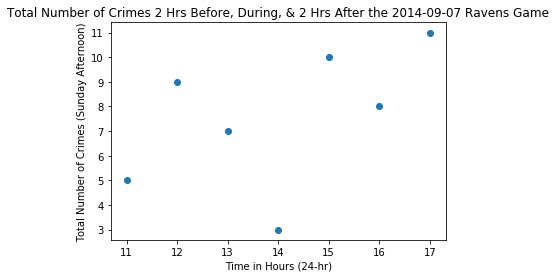

In [5]:
#2014-09-07 Graph
plt.scatter(crimedate1["Time"], crimedate1["Total Number of Crimes"])
plt.xlabel('Time in Hours (24-hr)')
plt.ylabel('Total Number of Crimes (Sunday Afternoon)')
plt.title('Total Number of Crimes 2 Hrs Before, During, & 2 Hrs After the 2014-09-07 Ravens Game')

#### 2014-11-09 (Sunday Afternoon Football)

In [6]:
#Total Number of Crimes - 2014-11-09 between Hours 11-17
crimedate2 = crimedatanew.loc[crimedata["Date"] == "2014-11-09"]
crimedate2 = crimedate2[["Date"]].groupby(crimedate2["Time"]).agg("count")
crimedate2 = crimedate2.reset_index()
crimedate2.columns = ["Time", "Total Number of Crimes"]
crimedate2

,Time,Total Number of Crimes
0,11,3
1,12,5
2,13,8
3,14,3
4,15,9
5,16,11
6,17,6


Text(0.5, 1.0, 'Total Number of Crimes 2 Hrs Before, During, & 2 Hrs After the 2014-11-09 Ravens Game')

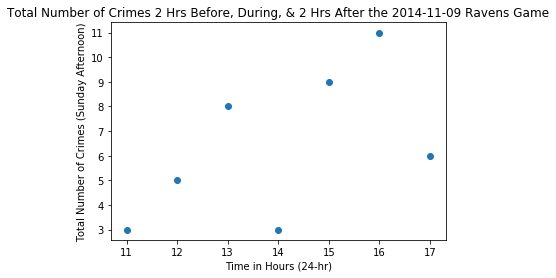

In [7]:
#2014-11-09 Graph
plt.scatter(crimedate2["Time"], crimedate2["Total Number of Crimes"])
plt.xlabel('Time in Hours (24-hr)')
plt.ylabel('Total Number of Crimes (Sunday Afternoon)')
plt.title('Total Number of Crimes 2 Hrs Before, During, & 2 Hrs After the 2014-11-09 Ravens Game')

### Crime Numbers Not During Baltimore Ravens Football Games (i.e. Not Sunday Afternoon) (Control Events)

From the Baltimore Ravens Schedule 2014 Dataframe, we see that there at least are two games that did not occur on Sunday Afternoons, the usual day that the Baltimore Ravens would play. We will be using the Sunday Afternoons where no game took place as control events to answer our Research Question. I chose Sunday Afternoon Dates that were closest to the same week in which a Football game occurred. 
<br>
<br>
These dates are:
<br>
<br>
2014-09-14 (Sun) which is closest to 2014-09-11 (Thurs) Game
<br>
2014-11-23 (Sun) which is closest to the 2014-11-24 (Mon) Game
<br>
<br>
Because these games did not occur on a normal Sunday Afternoon and are control events, I wanted to look at the same range of time in hours during a normal Football game so that we can calculate the percent change at the very end to see if the presence of football games are associated the number of crime reports in Baltimore, Maryland (i.e. Hours 11-17 on a 24-Hr).
<br>
<br>
(Reference the 'baltrav' dataset)
<br>
<br>
The same method was used where we used the 24-Hr format to create a dataframe with Hours 11-17. Then, we grouped the dataframe by Time in 24-Hr format to see the Total Number of Crimes that occurred during each specific hour. To display the results, we used a scatterplot.

#### 2014-09-14 (No Sunday Afternoon Football Game) (Control Event)

In [16]:
#Total Number of Crimes - 2014-09-07 between Hours 11-17
crimedate5 = crimedatanew.loc[crimedatanew["Date"] == "2014-09-14"]
crimedate5 = crimedate5[["Date"]].groupby(crimedate5["Time"]).agg("count")
crimedate5 = crimedate5.reset_index()
crimedate5.columns = ["Time", "Total Number of Crimes"]
crimedate5

,Time,Total Number of Crimes
0,11,4
1,12,5
2,13,2
3,14,6
4,15,5
5,16,4
6,17,11


Text(0.5, 1.0, 'Total Number of Crimes with No Sunday Afternoon Football Game Occurring')

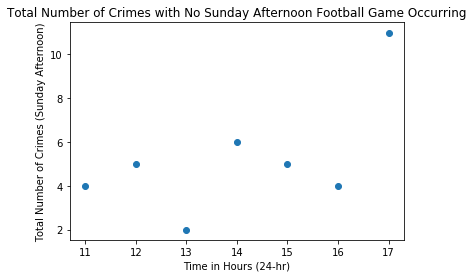

In [17]:
#2014-09-07 Graph
plt.scatter(crimedate5["Time"], crimedate5["Total Number of Crimes"])
plt.xlabel('Time in Hours (24-hr)')
plt.ylabel('Total Number of Crimes (Sunday Afternoon)')
plt.title('Total Number of Crimes with No Sunday Afternoon Football Game Occurring')

#### 2014-11-23 (No Sunday Afternoon Football Game) (Control Event)

In [18]:
#Total Number of Crimes - 2014-11-23 between Hours 11-17
crimedate6 = crimedatanew.loc[crimedatanew["Date"] == "2014-11-23"]
crimedate6 = crimedate6[["Date"]].groupby(crimedate6["Time"]).agg("count")
crimedate6 = crimedate6.reset_index()
crimedate6.columns = ["Time", "Total Number of Crimes"]
crimedate6

,Time,Total Number of Crimes
0,11,7
1,12,9
2,13,5
3,14,8
4,15,3
5,16,6
6,17,6


Text(0.5, 1.0, 'Total Number of Crimes with No Sunday Afternoon Football Game Occurring')

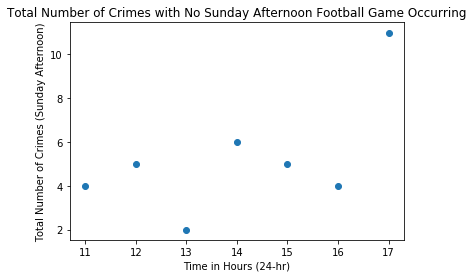

In [19]:
#2014-11-17 Graph
plt.scatter(crimedate5["Time"], crimedate5["Total Number of Crimes"])
plt.xlabel('Time in Hours (24-hr)')
plt.ylabel('Total Number of Crimes (Sunday Afternoon)')
plt.title('Total Number of Crimes with No Sunday Afternoon Football Game Occurring')

#### Calculating Percent Change in Total Number of Crime Reports

The following is how the percent increase/decrease was calculated when comparing the Total Number of Crimes on Sunday Afternoon while a Football Game is occurring vs. the Total Number of Crimes on Sunday Afternoon while a Football Game is not occurring:
<br>
<br>
Formula's Used:
#### % Increase
Increase = New Number - Original Number
<br>
% Increase = Increase/Original Number * 100
<br>
#### % Decrease
Decrease = Original Number - New Number
<br>
% Decrease = Decrease/Original Number * 100
<br>

#### Percent Change for Total Number of Sunday Afternoon Crime Reports for 2014-09-07 (Game) and 2014-09-14 (No Game - Control)

HR 11: 20% Decrease
<br>
HR 12: 44.4% Decrease
<br>
HR 13: 71.4% Decrease
<br>
HR 14: 100% Increase
<br>
HR 15: 50% Decrease
<br>
HR 16: 50% Decrease
<br>
HR 17: 0% Increase/Decrease
<br>

#### Percent Change for Total Number of Sunday Afternoon Crime Reports for 2014-11-09 (Game) and 2014-11-23 (No Game - Control)

HR 11: 133.3% Increase
<br>
HR 12: 80% Increase
<br>
HR 13: 37.5% Decrease
<br>
HR 14: 166.7% Increase
<br>
HR 15: 66.7% Decrease
<br>
HR 16: 45.5% Decrease
<br>
HR 17: 0% Increase/Decrease
<br>

#### Works Cited:
“Crime Report 2013”, Accessed from https://data.baltimorecity.gov/Public-Safety/Crime-Report-2013/d8wr-cji4 on April 24, 2020.

“2014 Baltimore Ravens Statistics & Players", Accessed from https://www.pro-football-reference.com/teams/rav/2014.htm on April 24, 2020.

#### Explanation of Data:
The first dataset is titled Crime Report 2013 and is an Open Dataset crime dataset that includes Victim based crime data. The dataset is split describes the time in which the crime was reported as well as details describing the location of the crime, neighborhood, and etc.
<br>
<br>
The second dataset is titled 2014 Baltimore Ravens Statistics & Players. The dataset was given as a CSV in which it was pasted into an Excel document and saved as a CSV file. This dataset describes the full schedule of the Baltimore Ravens Football Games that occurred in the year 2014.

#### Description of Results:
The way that I gathered my results was by reading in the csv's of both datasets. In order to answer the research question successfully, I had to create new dataframes that only incldued the datetime objects of when the crime occurred within the specified dates and hours of the Baltimore Raven's Football Game. As mentioned earlier, I used the 24-Hr format and created a dataframe for all dates with two hours before (Hours 11-12), the time during the game (around 3 hours) (Hours 13-15), and two hours after (Hours 16-17), whether or not an actual game was occuring. Then, I grouped the dataframe by Time in 24-Hr format to see the Total Number of Crimes that occurred during each specific hour. To display the results, a scatterplot was used.
<br>
<br>
I also used a % Increase and % Decrease formula to observe the percent changes in the number of Crime Reports in Baltimore, Maryland when comparing dates where a Football Game occurred to dates where a Football Game did not occur (i.e. the control).

#### Summary of Results:
We are able to interpret the Crime Report % changes calculated above. First, when comparing the number of Crimes on 2014-09-07 (Game) and 2014-09-14 (No Game - Control), we can see that for a majority of the hours (i.e. 11-17), the total number of crimes that were reported in the Baltimore, Maryland area significantly decreased on the Non-Game Day. However, we see a spike in HR 14 (i.e. around 2PM) where the number of crimes increased dramatically by 100%. Soon after, the number of crime reports decreased again by 50% within the next hour. Another interesting factor was seeing that there was a 0% Increase/Decrease in the number of Crime Reports in HR 17 (i.e. around 5PM). 
<br>
<br>
When comparing the number of Crimes on 2014-11-09 (Game) and 2014-11-23 (No Game - Control), we can see that within the first hour there is a large % increase in the number of crime reports, reaching over 100% on a Non-Game Day. There remains an increase in the number of reports within HR 12, however, the increase is not as large as HR 11. Soon after, the number of Crime reports begin to decrease, however, there is another spike in HR 14, where the number of Crime reports reaches over 100% on a Non-Game Day. For HR 15 and 16, the number of crime reports decreases again and similar to the first comparison, there is a 0% Increase/Decrease in the number of Crime reports in HR 17 (i.e. around 5PM)

#### Take-away Message:
The main take-away message after interpreting our results is that we can mostly conclude that there is a large difference in the number of Crime reports on a Ravens Football Game Day vs. a Non-Game Day. The first comparison showcases that there is a large decrease in the number of Crime Reports on a Non-Game Day (2014-09-14) when compared to the regular Sunday Afternoon Game Day (2014-09-07). However, within the second comparison, although there are specific hours in which the Crime Reports decrease on a Non-Game Day (2014-11-23) when compared to a regular Sunday Afternoon Game Day (2014-11-09), the increases in specific hours outweigh the percentage of decrease. Since many of these percent increases spike over 100%, we can conclude that the number of Crime Reports has increased drastically, with more crime reports occuring on a Non-Game Day (2014-11-23).
<br>
<br>
When looking at both of these comparisons together, I believe we can not make a definite conclusion as to whether or not the occurance of Football Games directly affects the number of Crime Reports in Baltimore, Maryland. Although it may have some influence, it could also just be a coincedence. One would need to investigate futhur at other external factors to see if there is a direct correlation between the total number of crime reports in a given hour on days where football games occur/do not occur.

#### Limitations:
A major limitation is that we are only observing the year 2014 and the relationship between Crime Report incidents in Baltimore, Maryland within this designated Year. Within that, we have only selected two dates. In order to truly look at the relationship between Crime Report Incidents and Football Games, it would be better to look at a wide range of Reports in several given years, such as years 2010-2019. In addition, another limitation of the datasets was the presence of missing values, especially within the Crime Report 2013 dataset. There are several crimes that do not have dates, which could mean that the number of reports in the specified year that we are looking at (i.e. 2014) could either be less or even more than the actual number that appeared in the dataset. In addition, a limitation of the 2014 Baltimore Ravens Statistics & Players dataset was the lack of consistency between datetime values. Therefore, it was needed to coerce all errors and transform the time into the desired format.
